## Bootstrapping for Insurance Pricing

Suggested by Temisan Agbeyegbe

Mean Premium (with margin): $14.20
95% Confidence Interval: $11.80 - $16.75


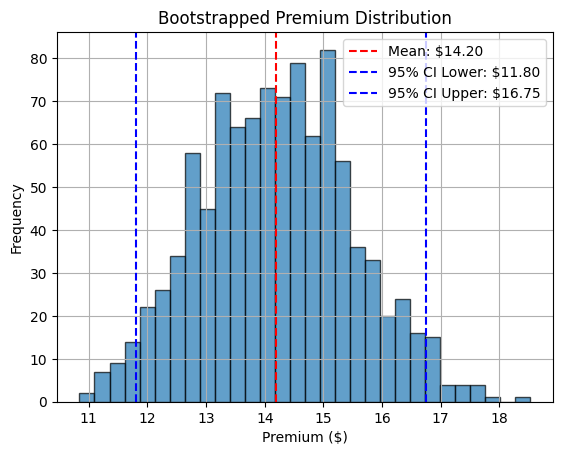

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated historical irradiance data (kWh/m² per day)
np.random.seed(42)  # For reproducibility
historical_irradiance = np.random.normal(5, 1.2, 1000)  # Mean 5, Std 1.2

# Define the insurance contract parameters
trigger_level = 4.0  # Irradiance threshold (kWh/m² per day)
payout_per_unit = 100  # Payout in USD per unit below the threshold
premium_margin = 1.2  # Factor to account for administrative costs and profit

# Calculate payouts based on historical data
def calculate_payouts(data):
    payouts = np.where(data < trigger_level, payout_per_unit * (trigger_level - data), 0)
    return payouts

# Bootstrapping function
def bootstrap_premium(data, num_samples=1000):
    bootstrapped_premiums = []
    for _ in range(num_samples):
        # Resample with replacement
        resampled_data = np.random.choice(data, size=len(data), replace=True)
        # Calculate expected payouts for the resampled dataset
        payouts = calculate_payouts(resampled_data)
        expected_payout = np.mean(payouts)
        bootstrapped_premiums.append(expected_payout)
    return np.array(bootstrapped_premiums)

# Perform bootstrapping
num_bootstrap_samples = 1000
bootstrapped_premiums = bootstrap_premium(historical_irradiance, num_bootstrap_samples)

# Calculate mean premium and confidence intervals
mean_premium = np.mean(bootstrapped_premiums) * premium_margin
confidence_interval = np.percentile(bootstrapped_premiums, [2.5, 97.5]) * premium_margin

# Print results
print(f"Mean Premium (with margin): ${mean_premium:.2f}")
print(f"95% Confidence Interval: ${confidence_interval[0]:.2f} - ${confidence_interval[1]:.2f}")

# Plot bootstrapped premium distribution
plt.hist(bootstrapped_premiums * premium_margin, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(mean_premium, color='red', linestyle='--', label=f"Mean: ${mean_premium:.2f}")
plt.axvline(confidence_interval[0], color='blue', linestyle='--', label=f"95% CI Lower: ${confidence_interval[0]:.2f}")
plt.axvline(confidence_interval[1], color='blue', linestyle='--', label=f"95% CI Upper: ${confidence_interval[1]:.2f}")
plt.title("Bootstrapped Premium Distribution")
plt.xlabel("Premium ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


Explanation

    Historical Data:
        The code uses simulated irradiance data, which can be replaced with actual historical observations.

    Payout Calculation:
        Payouts are triggered when irradiance falls below the trigger_level. The payout amount is proportional to the shortfall.

    Bootstrapping:
        The code resamples the historical data with replacement to generate multiple bootstrap samples.
        For each sample, it calculates the expected payout and stores it.

    Premium Calculation:
        The average expected payout across bootstrap samples is scaled by a premium_margin to account for administrative costs and profit.

    Output:
        The code calculates the mean premium and a 95% confidence interval.
        A histogram visualizes the distribution of bootstrapped premiums.



Monte Carlo Simulation for Insurance Pricing

Mean Premium (with margin): $16.30
95% Confidence Interval: $13.66 - $19.16


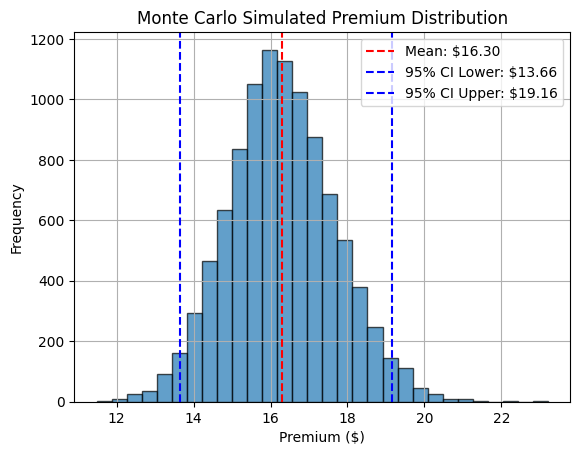

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for irradiance distribution (kWh/m² per day)
mean_irradiance = 5  # Average daily irradiance
std_dev_irradiance = 1.2  # Standard deviation
num_days = 1000  # Number of days to simulate

# Define insurance contract parameters
trigger_level = 4.0  # Irradiance threshold (kWh/m² per day)
payout_per_unit = 100  # Payout in USD per unit below the threshold
premium_margin = 1.2  # Factor for administrative costs and profit

# Monte Carlo simulation function
def monte_carlo_premium(num_simulations):
    simulated_premiums = []
    for _ in range(num_simulations):
        # Simulate irradiance data
        simulated_irradiance = np.random.normal(mean_irradiance, std_dev_irradiance, num_days)
        # Calculate payouts
        payouts = np.where(simulated_irradiance < trigger_level,
                           payout_per_unit * (trigger_level - simulated_irradiance), 0)
        # Calculate expected payout for this simulation
        expected_payout = np.mean(payouts)
        simulated_premiums.append(expected_payout)
    return np.array(simulated_premiums)

# Run Monte Carlo simulation
num_simulations = 10000
simulated_premiums = monte_carlo_premium(num_simulations)

# Calculate mean premium and confidence intervals
mean_premium = np.mean(simulated_premiums) * premium_margin
confidence_interval = np.percentile(simulated_premiums, [2.5, 97.5]) * premium_margin

# Print results
print(f"Mean Premium (with margin): ${mean_premium:.2f}")
print(f"95% Confidence Interval: ${confidence_interval[0]:.2f} - ${confidence_interval[1]:.2f}")

# Plot simulated premium distribution
plt.hist(simulated_premiums * premium_margin, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(mean_premium, color='red', linestyle='--', label=f"Mean: ${mean_premium:.2f}")
plt.axvline(confidence_interval[0], color='blue', linestyle='--', label=f"95% CI Lower: ${confidence_interval[0]:.2f}")
plt.axvline(confidence_interval[1], color='blue', linestyle='--', label=f"95% CI Upper: ${confidence_interval[1]:.2f}")
plt.title("Monte Carlo Simulated Premium Distribution")
plt.xlabel("Premium ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


Explanation

    Irradiance Simulation:
        Simulates daily irradiance data using a normal distribution (mean=5mean=5, std dev=1.2std dev=1.2).
        Adjust these parameters based on real-world historical data.

    Payout Calculation:
        For each simulated irradiance value, calculate the payout when irradiance falls below the trigger level. The payout is proportional to the shortfall.

    Monte Carlo Simulation:
        Repeats the simulation over a large number of iterations (10,000 by default) to approximate the expected payout distribution.

    Premium Calculation:
        Calculates the mean premium as the average of expected payouts

        across all simulations, adjusted by a premium_margin to include administrative costs and profit.

    Output:
        Prints the mean premium and a 95% confidence interval for the estimated premium.
        Generates a histogram of simulated premiums for visualization.



Code for  SARIMA-GARCH Modeling

In [9]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 12.1 MB/s eta 0:00:00


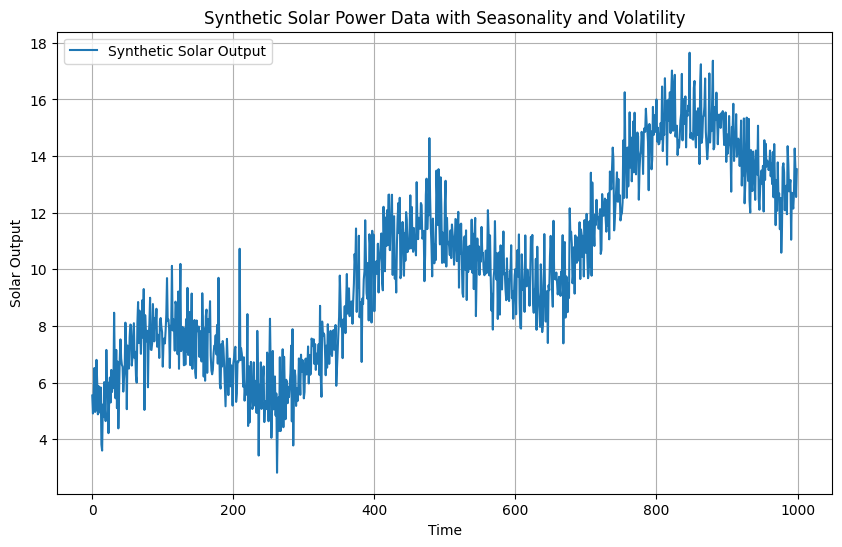

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model

# Generate synthetic solar power data (with seasonality and volatility clustering)
np.random.seed(42)
n = 1000
time = np.arange(n)
seasonality = 5 + 2 * np.sin(2 * np.pi * time / 365)  # Yearly seasonality
trend = 0.01 * time  # Small upward trend
noise = np.random.normal(0, 1, n)
volatility = np.sqrt(0.5 + 0.5 * np.abs(np.random.normal(0, 1, n)))
residuals = noise * volatility  # Volatility clustering
solar_output = seasonality + trend + residuals

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(solar_output, label="Synthetic Solar Output")
plt.title("Synthetic Solar Power Data with Seasonality and Volatility")
plt.xlabel("Time")
plt.ylabel("Solar Output")
plt.legend()
plt.grid()
plt.show()

# Step 1: Fit a SARIMA model to capture seasonality and trend
sarima_order = (1, 1, 1)  # ARIMA(p, d, q)
seasonal_order = (1, 1, 1, 365)  # SARIMA(P, D, Q, s)

sarima_model = SARIMAX(solar_output, order=sarima_order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)
print(sarima_fit.summary())

# Extract residuals from the SARIMA model
sarima_residuals = sarima_fit.resid

# Plot SARIMA residuals
plt.figure(figsize=(10, 6))
plt.plot(sarima_residuals, label="SARIMA Residuals")
plt.title("Residuals from SARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Step 2: Fit a GARCH model to the SARIMA residuals
garch_model = arch_model(sarima_residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# Extract conditional volatility from the GARCH model
conditional_volatility = garch_fit.conditional_volatility

# Plot conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(conditional_volatility, label="Conditional Volatility (GARCH)")
plt.title("Volatility from GARCH Model on SARIMA Residuals")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()

# Combine SARIMA and GARCH forecasts
# Step 3: Forecast using SARIMA-GARCH
n_forecast = 30  # Number of steps to forecast
sarima_forecast = sarima_fit.get_forecast(steps=n_forecast)
sarima_forecast_mean = sarima_forecast.predicted_mean

# Use GARCH to forecast volatility
garch_forecast = garch_fit.forecast(horizon=n_forecast)
garch_forecast_volatility = garch_forecast.variance.values[-1, :]  # Variance for next steps

# Combine forecasts: SARIMA mean and GARCH volatility
forecast_index = np.arange(len(solar_output), len(solar_output) + n_forecast)
plt.figure(figsize=(10, 6))
plt.plot(solar_output, label="Observed Solar Output")
plt.plot(forecast_index, sarima_forecast_mean, label="SARIMA Forecast", color="blue")
plt.fill_between(forecast_index,
                 sarima_forecast_mean - 2 * np.sqrt(garch_forecast_volatility),
                 sarima_forecast_mean + 2 * np.sqrt(garch_forecast_volatility),
                 color="blue", alpha=0.2, label="SARIMA-GARCH 95% CI")
plt.title("SARIMA-GARCH Forecast")
plt.xlabel("Time")
plt.ylabel("Solar Output")
plt.legend()
plt.grid()
plt.show()


Explanation of the Code

    Data Simulation:
        Synthetic solar power data is generated with seasonality, a small trend, and volatility clustering to mimic real-world conditions.

    Step 1: SARIMA Model:
        A SARIMA model captures the trend and seasonality in the data.
        Residuals (unexplained variations) are extracted from the SARIMA model.

    Step 2: GARCH Model:
        A GARCH(1,1) model is fitted to the residuals to capture the time-varying volatility (volatility clustering).
        Conditional volatility is extracted for interpretation and forecasting.

    Step 3: Combined Forecasting:
        SARIMA provides the forecasted mean levels of the solar output.
        GARCH provides the forecasted volatility (uncertainty) around the mean.
        Together, they produce a complete forecast with confidence intervals that incorporate both seasonality/trend (SARIMA) and variability/risk (GARCH).

Output

    SARIMA Summary:
        Displays the fitted SARIMA model parameters and diagnostics.
    GARCH Summary:
        Displays the GARCH model parameters, including the persistence of volatility.
    Plots:
        Residuals from SARIMA.
        Conditional volatility from GARCH.
        Combined SARIMA-GARCH forecast with confidence intervals.

This approach provides a comprehensive modeling framework that captures both predictable components (trend/seasonality) and stochastic variability (volatility). It is particularly useful for applications like pricing solar index insurance, where both components influence risk and premiums.
